In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [62]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/Final_Data.csv','rU'), encoding='utf-8')
df.shape

(8006399, 22)

In [63]:
df.dtypes

FlightNum              int64
Year                   int64
Day                    int64
Month                  int64
Week                   int64
Origin                object
Dest                  object
UniqueCarrier         object
ArrTime                int64
DepTime                int64
CRSArrTime             int64
CRSDepTime             int64
CRSElapsedTime         int64
ActualElapsedTime      int64
ArrDelayMinutes        int64
DepDelayMinutes        int64
OriginCityName        object
DestCityName          object
Flight_Status          int64
OriginVisibility     float64
OriginWind           float64
OriginPrecip         float64
dtype: object

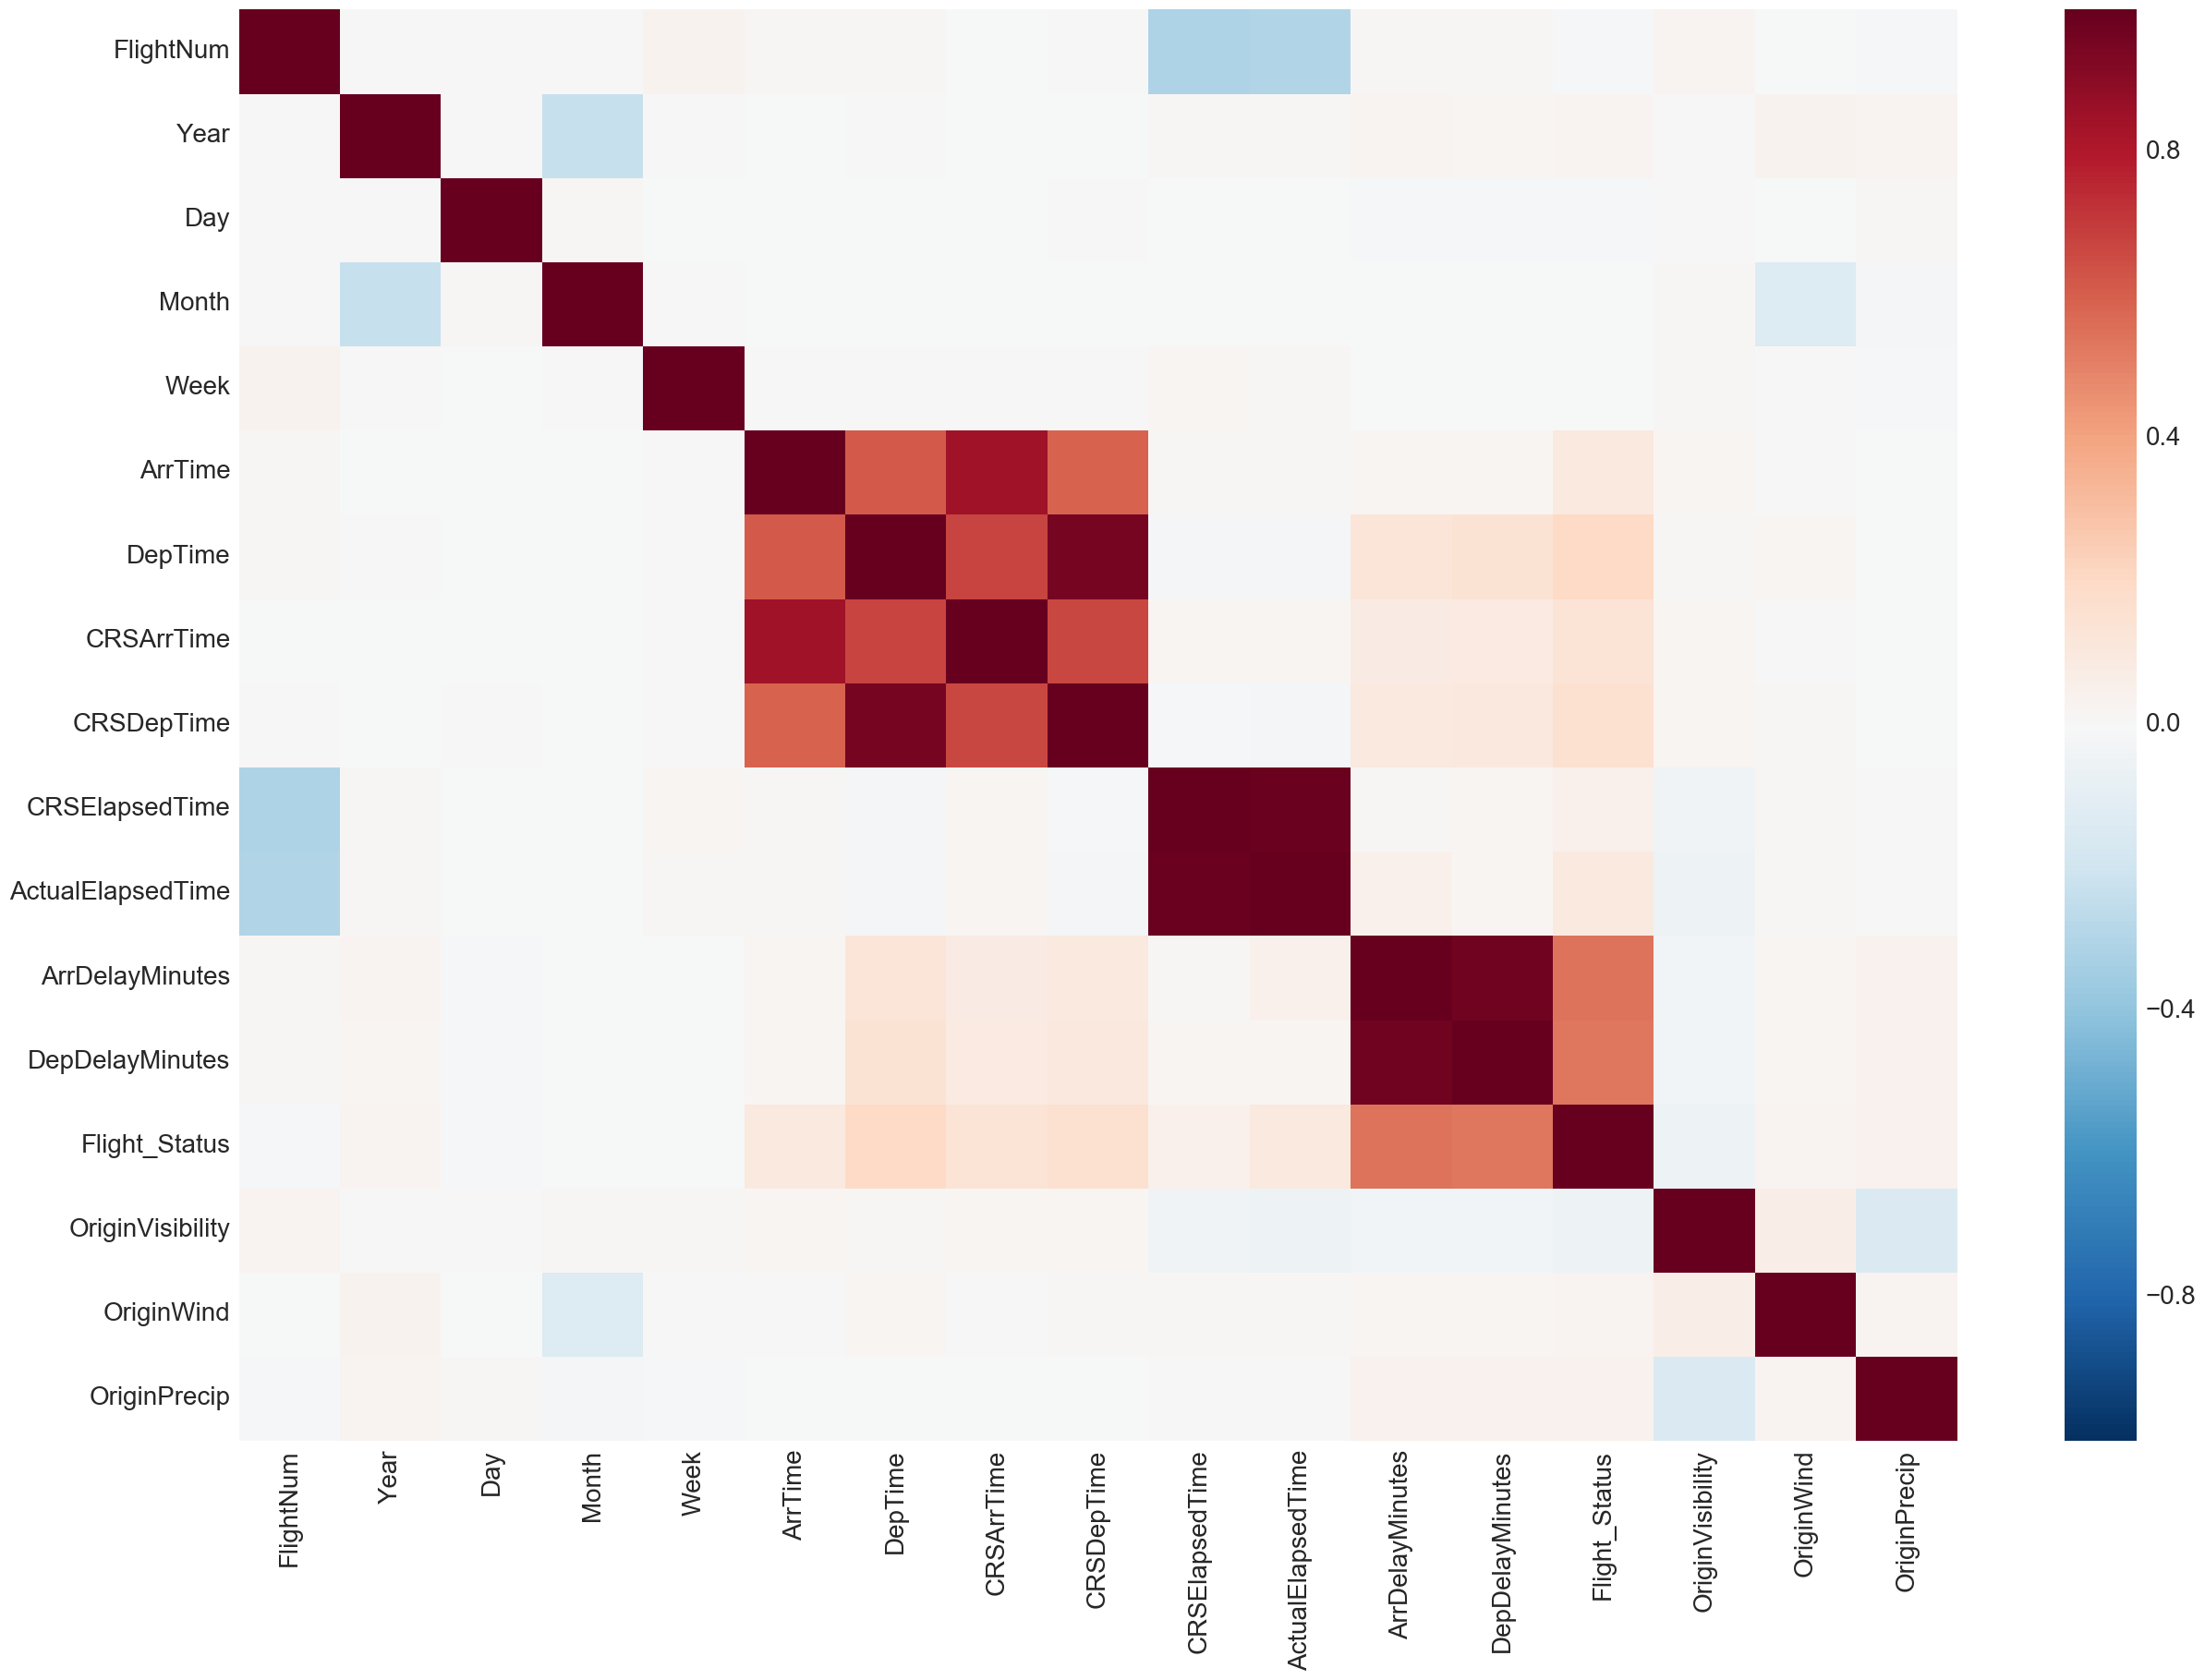

In [64]:
# Generating heat map for correlation between various columns

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

# Feature Selection for 'Status' of flight

In [65]:
cols = df.columns.tolist()
cols.remove('Flight_Status')

In [66]:
X= df[cols]
Y = df['Flight_Status']

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X['carrier'] = label_encoder.fit_transform(X['UniqueCarrier'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])
X['ori_city'] = label_encoder.fit_transform(X['OriginCityName'])
X['dest_city'] = label_encoder.fit_transform(X['DestCityName'])

X = X._get_numeric_data()

In [68]:
X.head()

,FlightNum,Year,Day,Month,Week,ArrTime,DepTime,CRSArrTime,CRSDepTime,CRSElapsedTime,...,ArrDelayMinutes,DepDelayMinutes,OriginVisibility,OriginWind,OriginPrecip,carrier,origin,dest,ori_city,dest_city
0,43,2016,6,1,3,1432,1057,1438,1100,158,...,0,0,8.0,7.0,0.78,0,64,69,58,63
1,43,2016,7,1,4,1426,1056,1438,1100,158,...,0,0,5.0,9.0,0.06,0,64,69,58,63
2,43,2016,8,1,5,1445,1055,1438,1100,158,...,7,0,9.0,6.0,0.00,0,64,69,58,63
3,43,2016,9,1,6,1433,1102,1438,1100,158,...,0,2,10.0,19.0,0.00,0,64,69,58,63
4,43,2016,10,1,7,1631,1240,1438,1100,158,...,113,100,10.0,9.0,0.00,0,64,69,58,63


In [69]:
s = X.columns.tolist()
for i in range(X.shape[1]):
     print(i,s[i])
#X.columns.tolist()

0 FlightNum
1 Year
2 Day
3 Month
4 Week
5 ArrTime
6 DepTime
7 CRSArrTime
8 CRSDepTime
9 CRSElapsedTime
10 ActualElapsedTime
11 ArrDelayMinutes
12 DepDelayMinutes
13 OriginVisibility
14 OriginWind
15 OriginPrecip
16 carrier
17 origin
18 dest
19 ori_city
20 dest_city


### Feature Importance--- EXTRA TRESS CLASSIFIER

Feature ranking:
1. feature 1 (0.228426)
2. feature 2 (0.130725)
3. feature 0 (0.100013)
4. feature 9 (0.033634)
5. feature 20 (0.031514)
6. feature 3 (0.030902)
7. feature 11 (0.030606)
8. feature 13 (0.030554)
9. feature 18 (0.030354)
10. feature 4 (0.030147)
11. feature 5 (0.030125)
12. feature 8 (0.029912)
13. feature 12 (0.029749)
14. feature 14 (0.029696)
15. feature 19 (0.029606)
16. feature 7 (0.029411)
17. feature 17 (0.029321)
18. feature 6 (0.029168)
19. feature 16 (0.028850)
20. feature 15 (0.028666)
21. feature 10 (0.028619)


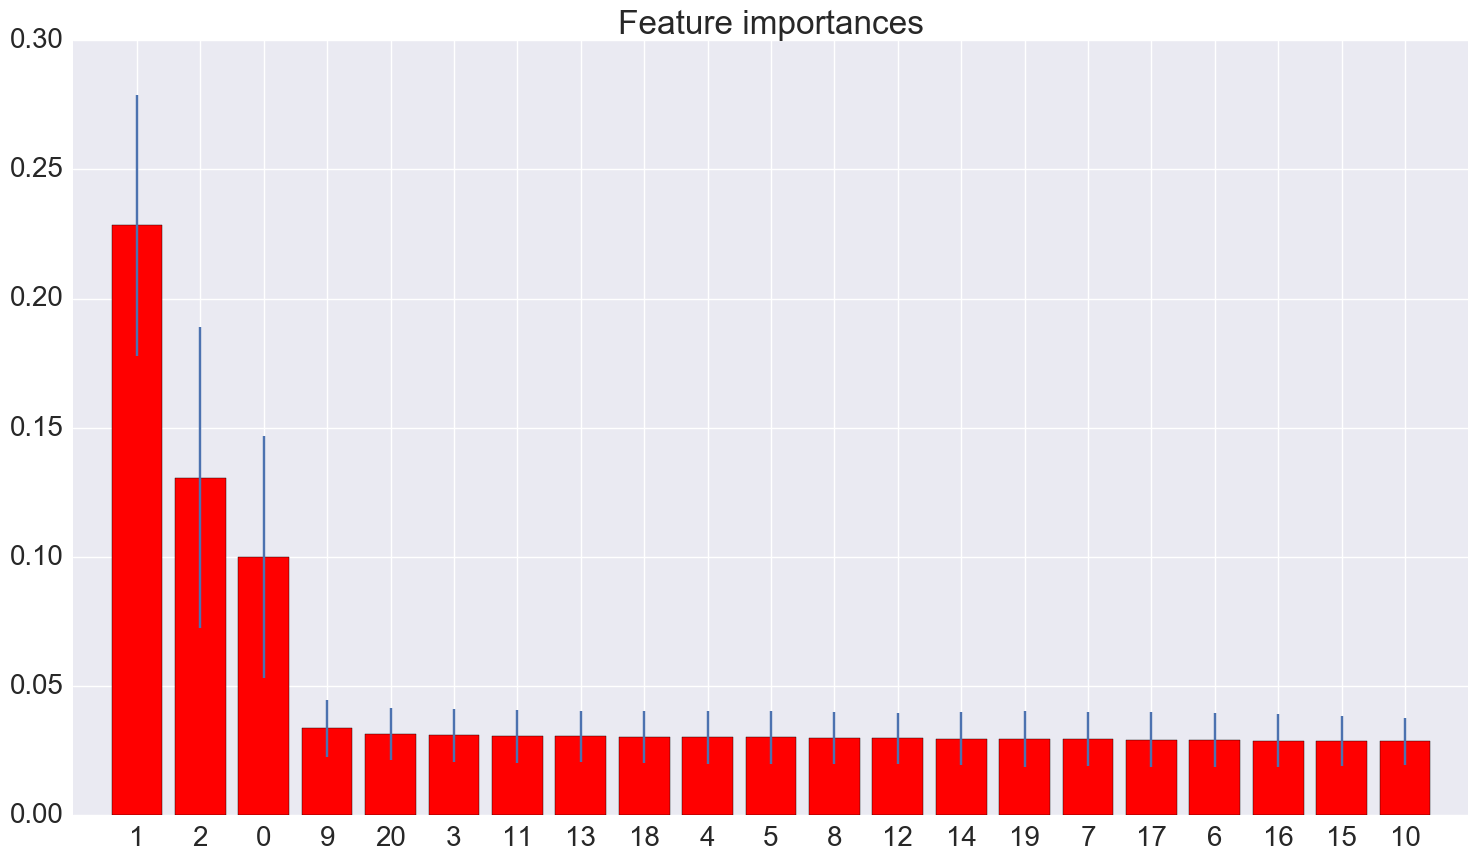

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=21,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.00571225  0.00162529  0.00616211  0.00621455  0.00528702  0.04621117
  0.03877836  0.03155341  0.03871327  0.01104635  0.01664048  0.37830489
  0.37413318  0.00502648  0.00558743  0.00394697  0.00555756  0.00491237
  0.00483327  0.00480666  0.00494692]


In [30]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, Y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True False False False  True False False False False]
[18  6 11  2  9 16 15 17 19  4  5  1  1  7  3  8  1 12 14 13 10]


In [31]:
X.columns

Index(['FlightNum', 'Year', 'Day', 'Month', 'Week', 'ArrTime', 'DepTime',
       'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'ArrDelayMinutes', 'DepDelayMinutes', 'OriginVisibility', 'OriginWind',
       'OriginPrecip', 'carrier', 'origin', 'dest', 'ori_city', 'dest_city'],
      dtype='object')

In [13]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
                            
sorted(clf.cv_results_.keys())                            

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [10]:
clf.get_params(deep=True)

{'cv': None,
 'error_score': 'raise',
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Cross Validation for splitting the data in train and test sets

In [12]:
X= df[cols]
y = df['Flight_Status']

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X['carrier'] = label_encoder.fit_transform(X['UniqueCarrier'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])
X['ori_city'] = label_encoder.fit_transform(X['OriginCityName'])
X['dest_city'] = label_encoder.fit_transform(X['DestCityName'])

X = X._get_numeric_data()

In [15]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# iris = load_iris()
# X, y = iris.data, iris.target
X.shape

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

(8006399, 2)

In [17]:
X_new

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 7.,  0.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [8]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

In [10]:
# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [11]:
X_train.head()

,FlightNum,Year,Day,Month,Week,ArrTime,DepTime,CRSArrTime,CRSDepTime,CRSElapsedTime,...,ArrDelayMinutes,DepDelayMinutes,OriginVisibility,OriginWind,OriginPrecip,carrier,origin,dest,ori_city,dest_city
5735510,1685,2017,25,4,2,1851,1727,1905,1730,95,...,0,0,10.0,9.0,0.0,3,16,185,14,178
3878461,1720,2016,16,11,3,1053,939,1041,937,124,...,12,2,10.0,7.0,0.0,3,16,171,14,147
3795517,3013,2016,22,10,6,1301,1131,1323,1138,105,...,0,0,6.0,7.0,0.0,8,250,138,241,144
2166340,1483,2016,2,6,4,918,603,912,600,372,...,6,3,10.0,7.0,0.0,9,81,227,173,215
7992256,577,2017,3,9,7,1117,841,1149,851,358,...,0,0,10.0,5.0,0.0,2,87,227,81,215


In [19]:
# Creating the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 250)
model = model.fit(X_train, y_train)

In [13]:
# Caluculating the accuracy of the model

accuracy = model.score(X_train, y_train)
print(accuracy)

0.977041755353


In [14]:
# Run the model on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [15]:
# Generating Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1845560   23416]
 [  31495  501449]]


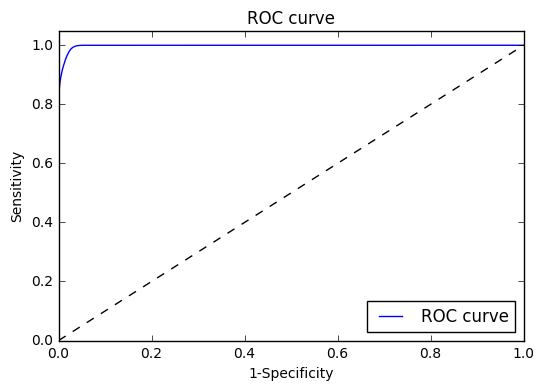

In [16]:
# ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Predict the values for test and train using the model
y_test_predicted = model.predict(X_test)
y_train_predicted= model.predict(X_train)

In [18]:
# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

MAE_train: 0.0229582446468
MAE_test: 0.0228612942979
RMS_train: 0.0229582446468
RMS_test: 0.0228612942979
